# GET READY AND LOAD DATA

In [31]:
# Import pandas for data tables
import pandas as pd
# Import numpy for math
import numpy as np
# Import matplotlib.pyplot for plots
import matplotlib.pyplot as plt
# Import seaborn for nicer plots
import seaborn as sns

# Show plots right in the notebook
%matplotlib inline

# Set a plot style
sns.set_style("darkgrid")

In [32]:
# Load data into 'laptop_df'
laptop_df = pd.read_csv('laptop_sales.csv')

# Show rows and columns
print(laptop_df.shape)

(1020, 29)


In [33]:
# Show first 5 rows
laptop_df.head()

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,...,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,...,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS


In [34]:
# Count missing values
print(laptop_df.isnull().sum())

# Count duplicate rows
laptop_df.duplicated().sum()

Unnamed: 0                  0
Name                        0
Brand                       0
Price                       0
Rating                      0
Processor_brand             0
Processor_name              0
Processor_variant          24
Processor_gen             129
Core_per_processor         12
Total_processor           447
Execution_units           447
Low_Power_Cores             0
Energy_Efficient_Units      0
Threads                    48
RAM_GB                      0
RAM_type                   22
Storage_capacity_GB         0
Storage_type                0
Graphics_name               2
Graphics_brand              2
Graphics_GB               652
Graphics_integreted         2
Display_size_inches         0
Horizontal_pixel            0
Vertical_pixel              0
ppi                         0
Touch_screen                0
Operating_system            0
dtype: int64


np.int64(0)

In [35]:
# Drop 'Unnamed: 0' column

laptop_df.drop('Unnamed: 0', axis=1, inplace=True)
print("\n'Unnamed: 0' removed. Columns now:", laptop_df.columns.tolist())


'Unnamed: 0' removed. Columns now: ['Name', 'Brand', 'Price', 'Rating', 'Processor_brand', 'Processor_name', 'Processor_variant', 'Processor_gen', 'Core_per_processor', 'Total_processor', 'Execution_units', 'Low_Power_Cores', 'Energy_Efficient_Units', 'Threads', 'RAM_GB', 'RAM_type', 'Storage_capacity_GB', 'Storage_type', 'Graphics_name', 'Graphics_brand', 'Graphics_GB', 'Graphics_integreted', 'Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel', 'ppi', 'Touch_screen', 'Operating_system']


In [36]:
# Count missing values
print("\nMissing values per column:")
laptop_df.isnull().sum()

# Count duplicate rows
print("\nNumber of duplicate rows found:", laptop_df.duplicated().sum())


Missing values per column:

Number of duplicate rows found: 0


# MAKE DATA CLEAN

In [37]:
# List of columns to potentially drop that are not directly useful or are too detailed
columns_to_drop = [
    'Unnamed: 0', # Common extra index column
    'Name',       # Laptop name, too unique for simple feature
    'Rating',
    'Processor_variant',
    'Processor_gen',
    'Core_per_processor',
    'Total_processor',    # Detailed
    'Execution_units',    # Very detailed
    'Low_Power_Cores',    # Very detailed
    'Energy_Efficient_Units', # Very detailed
    'Threads',            # Very detailed
    'RAM_type',
    'Graphics_GB',        # Redundant if 'Graphics_name' or 'Graphics_brand' explains performance
    'Graphics_integreted' # 'Graphics_name' and 'Graphics_brand' cover this
]

# Drop the columns. 'errors='ignore'' means if a column isn't found, it won't crash.
laptop_df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print("\nUseless columns removed. Our columns now are:")
print(laptop_df.columns.tolist())


Useless columns removed. Our columns now are:
['Brand', 'Price', 'Processor_brand', 'Processor_name', 'RAM_GB', 'Storage_capacity_GB', 'Storage_type', 'Graphics_name', 'Graphics_brand', 'Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel', 'ppi', 'Touch_screen', 'Operating_system']


In [38]:
# Ensure 'RAM_GB' is an integer
laptop_df['RAM_GB'] = laptop_df['RAM_GB'].astype(int)

# Ensure 'Display_size_inches' is a float
laptop_df['Display_size_inches'] = laptop_df['Display_size_inches'].astype(float)

# Check data types again to confirm
print("\nData types after cleaning 'RAM_GB' and 'Display_size_inches':")
laptop_df.info()

# Show first few rows to see changes
print("\nFirst 3 rows after cleaning RAM_GB and Display_size_inches:")
laptop_df.head(3)


Data types after cleaning 'RAM_GB' and 'Display_size_inches':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                1020 non-null   object 
 1   Price                1020 non-null   int64  
 2   Processor_brand      1020 non-null   object 
 3   Processor_name       1020 non-null   object 
 4   RAM_GB               1020 non-null   int64  
 5   Storage_capacity_GB  1020 non-null   int64  
 6   Storage_type         1020 non-null   object 
 7   Graphics_name        1018 non-null   object 
 8   Graphics_brand       1018 non-null   object 
 9   Display_size_inches  1020 non-null   float64
 10  Horizontal_pixel     1020 non-null   int64  
 11  Vertical_pixel       1020 non-null   int64  
 12  ppi                  1020 non-null   float64
 13  Touch_screen         1020 non-null   bool   
 14  Operating_system     1020

,Brand,Price,Processor_brand,Processor_name,RAM_GB,Storage_capacity_GB,Storage_type,Graphics_name,Graphics_brand,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,HP,50399,AMD,AMD Ryzen 5,8,512,SSD,AMD Radeon RX 6500M,AMD,15.6,1920,1080,141.21,True,Windows 11 OS
1,Lenovo,26690,AMD,AMD Ryzen 3,8,512,SSD,AMD Radeon Graphics,AMD,15.6,1920,1080,141.21,False,Windows 11 OS
2,HP,37012,Intel,Intel Core i3,8,512,SSD,Intel UHD Graphics,Intel,15.6,1920,1080,141.21,False,Windows 11 OS


In [39]:
# Round 'Price'
laptop_df['Price'] = laptop_df['Price'].round()

# Show changes
print("\nFirst 3 rows after rounding Price:")
laptop_df.head(3)


First 3 rows after rounding Price:


,Brand,Price,Processor_brand,Processor_name,RAM_GB,Storage_capacity_GB,Storage_type,Graphics_name,Graphics_brand,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,HP,50399,AMD,AMD Ryzen 5,8,512,SSD,AMD Radeon RX 6500M,AMD,15.6,1920,1080,141.21,True,Windows 11 OS
1,Lenovo,26690,AMD,AMD Ryzen 3,8,512,SSD,AMD Radeon Graphics,AMD,15.6,1920,1080,141.21,False,Windows 11 OS
2,HP,37012,Intel,Intel Core i3,8,512,SSD,Intel UHD Graphics,Intel,15.6,1920,1080,141.21,False,Windows 11 OS


# BUILD NEW INFO

In [40]:
# Function to get a simpler CPU name from 'Processor_name'
def simplify_processor(text):
    text = str(text).lower() # Convert to string and lowercase for easier matching
    if 'intel core i7' in text or 'intel core i5' in text or 'intel core i3' in text:
        return 'Intel Core' # Group all i3, i5, i7
    elif 'intel' in text:
        return 'Other Intel'
    elif 'amd' in text:
        return 'AMD'
    elif 'apple' in text:
        return 'Apple Silicon' # For M1, M2 etc.
    else:
        return 'Other CPU'

# Apply the function to create a new 'Cpu_Category' column
laptop_df['Cpu_Category'] = laptop_df['Processor_name'].apply(simplify_processor)

# Check the new column
print("\nCounts of simplified CPU types:")
laptop_df['Cpu_Category'].value_counts()


Counts of simplified CPU types:


Cpu_Category
Intel Core       596
AMD              250
Other Intel      146
Apple Silicon     18
Other CPU         10
Name: count, dtype: int64

In [41]:
# Initialize new storage capacity columns to 0
laptop_df['SSD_Capacity_GB'] = 0
laptop_df['HDD_Capacity_GB'] = 0

# Loop through each row to assign capacities based on Storage_type
for index, row in laptop_df.iterrows():
    storage_type = str(row['Storage_type']).lower()
    capacity = int(row['Storage_capacity_GB'])

    if 'ssd' in storage_type:
        laptop_df.loc[index, 'SSD_Capacity_GB'] = capacity
    elif 'hdd' in storage_type:
        laptop_df.loc[index, 'HDD_Capacity_GB'] = capacity

# Drop the original 'Storage_capacity_GB' and 'Storage_type' columns now
laptop_df.drop(columns=['Storage_capacity_GB', 'Storage_type'], inplace=True)

# See the data with our new storage columns
print("\nFirst 3 rows after processing Storage:")
laptop_df.head(3)


First 3 rows after processing Storage:


,Brand,Price,Processor_brand,Processor_name,RAM_GB,Graphics_name,Graphics_brand,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system,Cpu_Category,SSD_Capacity_GB,HDD_Capacity_GB
0,HP,50399,AMD,AMD Ryzen 5,8,AMD Radeon RX 6500M,AMD,15.6,1920,1080,141.21,True,Windows 11 OS,AMD,512,0
1,Lenovo,26690,AMD,AMD Ryzen 3,8,AMD Radeon Graphics,AMD,15.6,1920,1080,141.21,False,Windows 11 OS,AMD,512,0
2,HP,37012,Intel,Intel Core i3,8,Intel UHD Graphics,Intel,15.6,1920,1080,141.21,False,Windows 11 OS,Intel Core,512,0


In [42]:
# Extract the first word from 'Graphics_name' to get the brand
laptop_df['Gpu_Brand_Category'] = laptop_df['Graphics_name'].apply(lambda x: str(x).split()[0] if pd.notna(x) else 'Unknown')

# Check how many laptops have each GPU brand
print("\nCounts of GPU Brand Categories:")
laptop_df['Gpu_Brand_Category'].value_counts()

# Group less common brands into 'Other'
# You might need to adjust this list based on your data's actual unique GPU brands
common_gpu_brands = ['Intel', 'Nvidia', 'AMD']
laptop_df['Gpu_Brand_Category'] = laptop_df['Gpu_Brand_Category'].apply(lambda x: x if x in common_gpu_brands else 'Other')

# Check counts after grouping
print("\nCounts of GPU Brand Categories after grouping 'Other':")
laptop_df['Gpu_Brand_Category'].value_counts()


Counts of GPU Brand Categories:

Counts of GPU Brand Categories after grouping 'Other':


Gpu_Brand_Category
Intel     437
Other     426
AMD       149
Nvidia      8
Name: count, dtype: int64

In [43]:
# Function to group operating systems
def group_os(os_name):
    os_name = str(os_name).lower()
    if 'windows' in os_name:
        return 'Windows'
    elif 'mac' in os_name: # Covers both Mac and macOS
        return 'Mac'
    elif 'linux' in os_name:
        return 'Linux'
    else:
        return 'Other/No OS' # Includes DOS, FreeDOS, and 'None' or unknown

# Apply the function to create a new 'OS_Category' column
laptop_df['OS_Category'] = laptop_df['Operating_system'].apply(group_os)

# Check the new column
print("\nCounts of OS Categories:")
laptop_df['OS_Category'].value_counts()


Counts of OS Categories:


OS_Category
Windows        960
Other/No OS     39
Mac             20
Linux            1
Name: count, dtype: int64

In [44]:
# Columns to drop after creating new, cleaner features
final_columns_to_drop = [
    'Processor_brand', 'Processor_name', 'Graphics_name', 'Graphics_brand', 'Operating_system'
]

# Drop these columns, ignoring if they are already gone
laptop_df.drop(columns=final_columns_to_drop, axis=1, inplace=True, errors='ignore')

print("\nFinal data columns after feature engineering:")
print(laptop_df.columns.tolist())

print("\nFirst 5 rows of final processed data:")
laptop_df.head()


Final data columns after feature engineering:
['Brand', 'Price', 'RAM_GB', 'Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel', 'ppi', 'Touch_screen', 'Cpu_Category', 'SSD_Capacity_GB', 'HDD_Capacity_GB', 'Gpu_Brand_Category', 'OS_Category']

First 5 rows of final processed data:


,Brand,Price,RAM_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Cpu_Category,SSD_Capacity_GB,HDD_Capacity_GB,Gpu_Brand_Category,OS_Category
0,HP,50399,8,15.6,1920,1080,141.21,True,AMD,512,0,AMD,Windows
1,Lenovo,26690,8,15.6,1920,1080,141.21,False,AMD,512,0,AMD,Windows
2,HP,37012,8,15.6,1920,1080,141.21,False,Intel Core,512,0,Intel,Windows
3,Samsung,69990,16,13.3,1080,1920,165.63,False,Intel Core,512,0,Intel,Windows
4,Tecno,23990,8,15.6,1920,1080,141.21,False,Intel Core,512,0,Intel,Windows


# Look at Data Pictures (EDA - Exploratory Data Analysis)

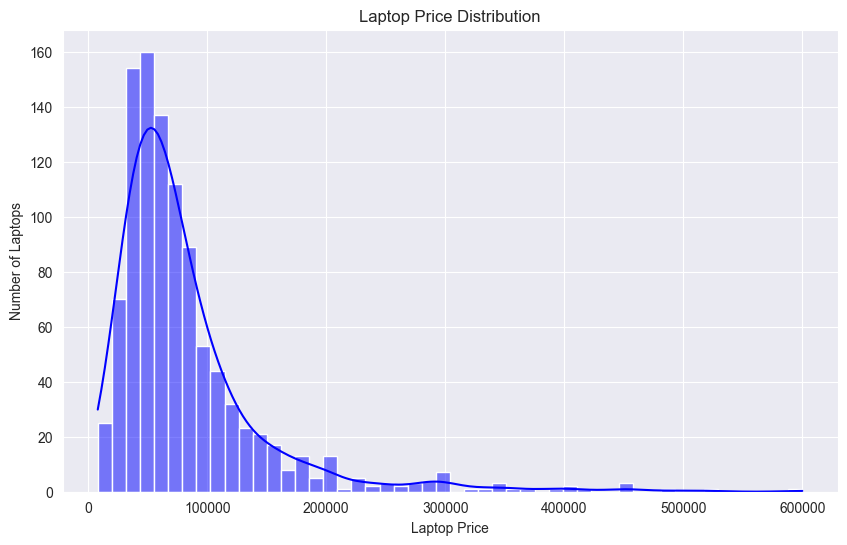

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(laptop_df['Price'], kde=True, bins=50, color='blue')
plt.title('Laptop Price Distribution')
plt.xlabel('Laptop Price')
plt.ylabel('Number of Laptops')
plt.show()

C:\Users\Charan Teja\AppData\Local\Temp\ipykernel_6568\2585616715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price', data=laptop_df, palette='viridis')


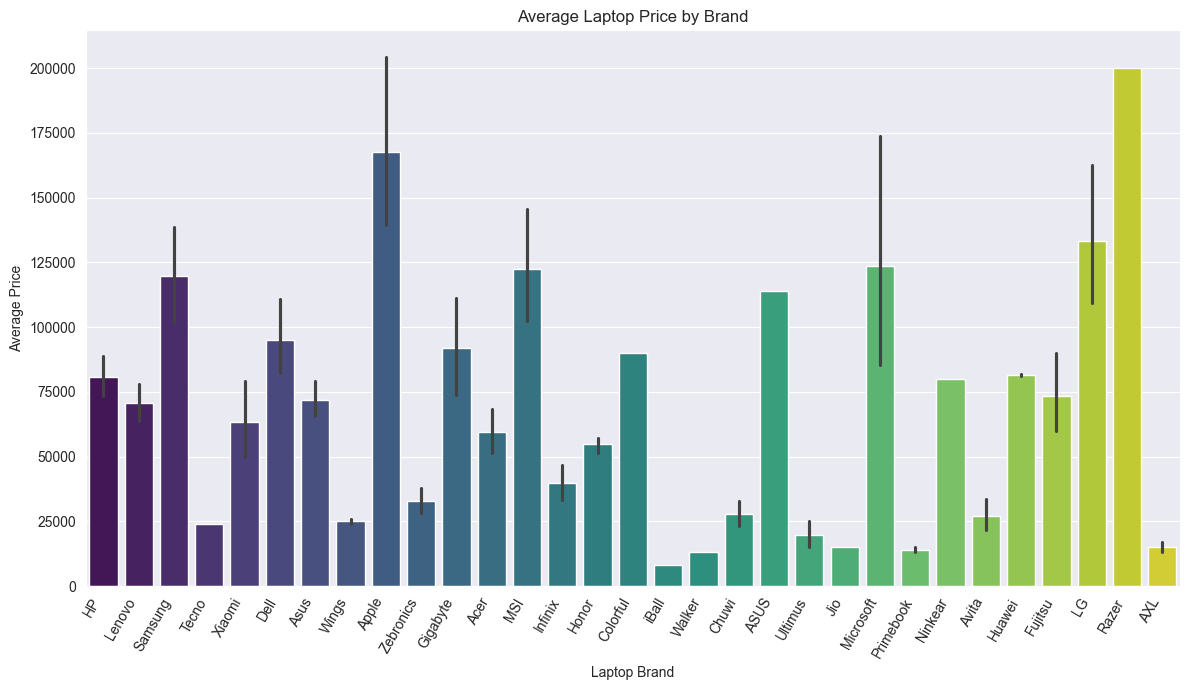

In [46]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Brand', y='Price', data=laptop_df, palette='viridis')
plt.xticks(rotation=60, ha='right')
plt.title('Average Laptop Price by Brand')
plt.xlabel('Laptop Brand')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

C:\Users\Charan Teja\AppData\Local\Temp\ipykernel_6568\870759678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RAM_GB', y='Price', data=laptop_df, palette='cividis')


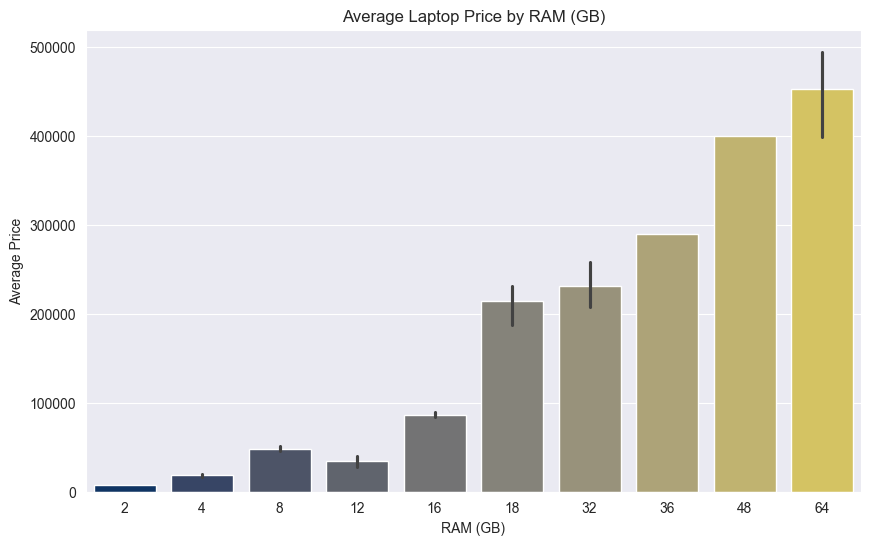

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RAM_GB', y='Price', data=laptop_df, palette='cividis')
plt.title('Average Laptop Price by RAM (GB)')
plt.xlabel('RAM (GB)')
plt.ylabel('Average Price')
plt.show()

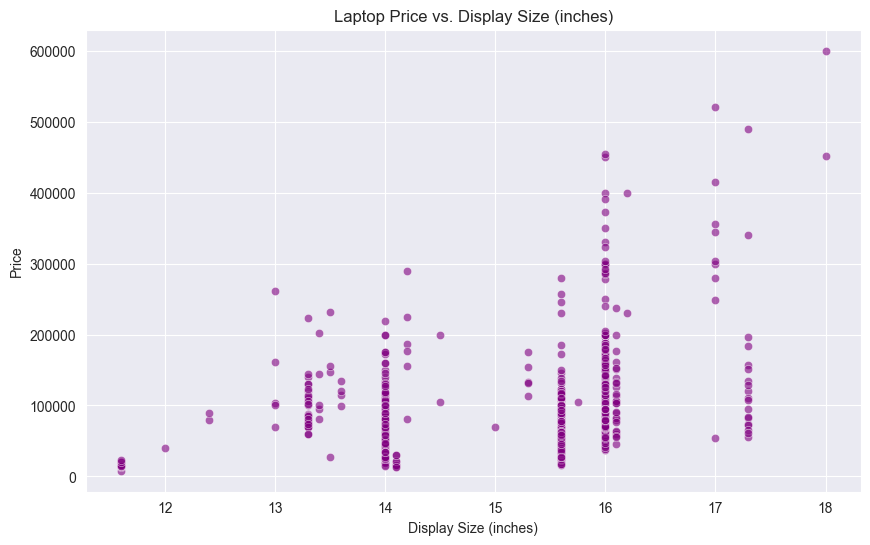

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Display_size_inches', y='Price', data=laptop_df, alpha=0.6, color='purple')
plt.title('Laptop Price vs. Display Size (inches)')
plt.xlabel('Display Size (inches)')
plt.ylabel('Price')
plt.show()

C:\Users\Charan Teja\AppData\Local\Temp\ipykernel_6568\3564698648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Touch_screen', y='Price', data=laptop_df, palette='coolwarm')


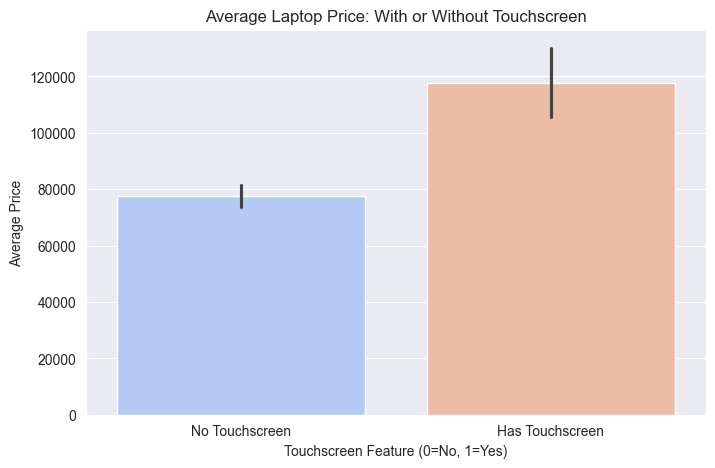

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Touch_screen', y='Price', data=laptop_df, palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['No Touchscreen', 'Has Touchscreen'])
plt.title('Average Laptop Price: With or Without Touchscreen')
plt.xlabel('Touchscreen Feature (0=No, 1=Yes)')
plt.ylabel('Average Price')
plt.show()

C:\Users\Charan Teja\AppData\Local\Temp\ipykernel_6568\2729662419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cpu_Category', y='Price', data=laptop_df, palette='rocket')


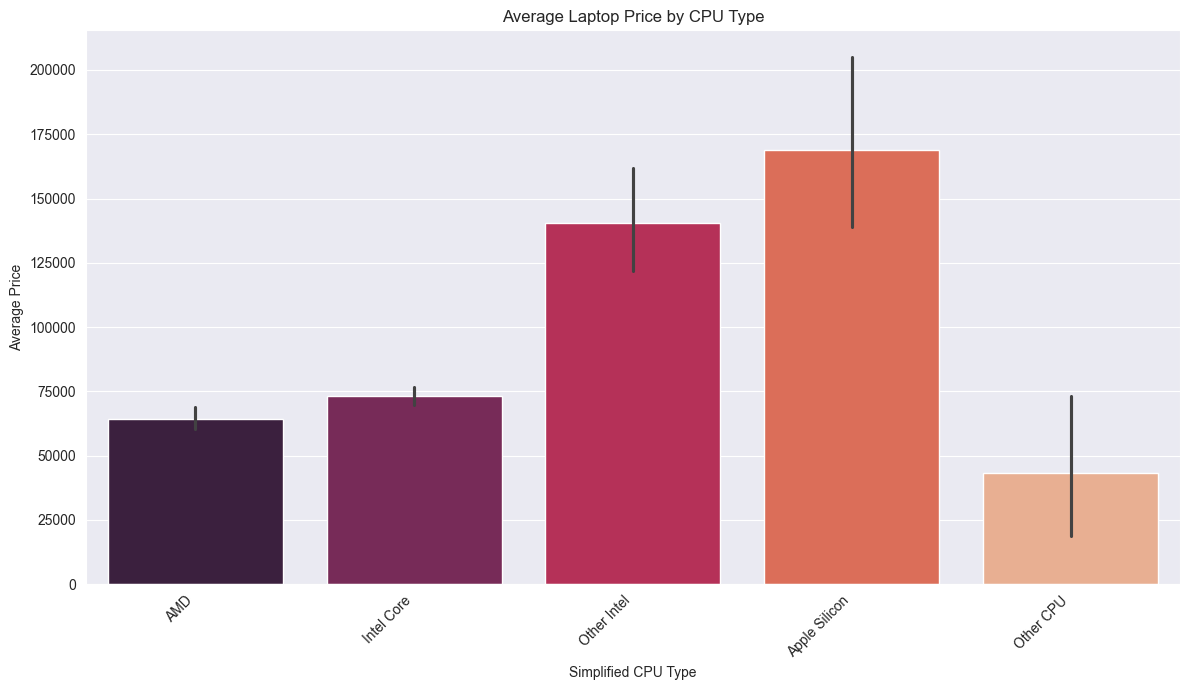

In [50]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Cpu_Category', y='Price', data=laptop_df, palette='rocket')
plt.xticks(rotation=45, ha='right')
plt.title('Average Laptop Price by CPU Type')
plt.xlabel('Simplified CPU Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

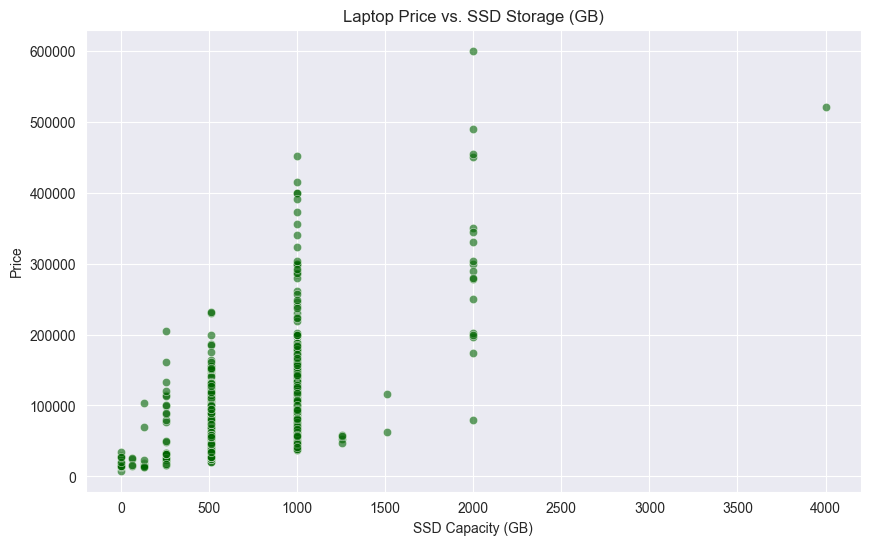

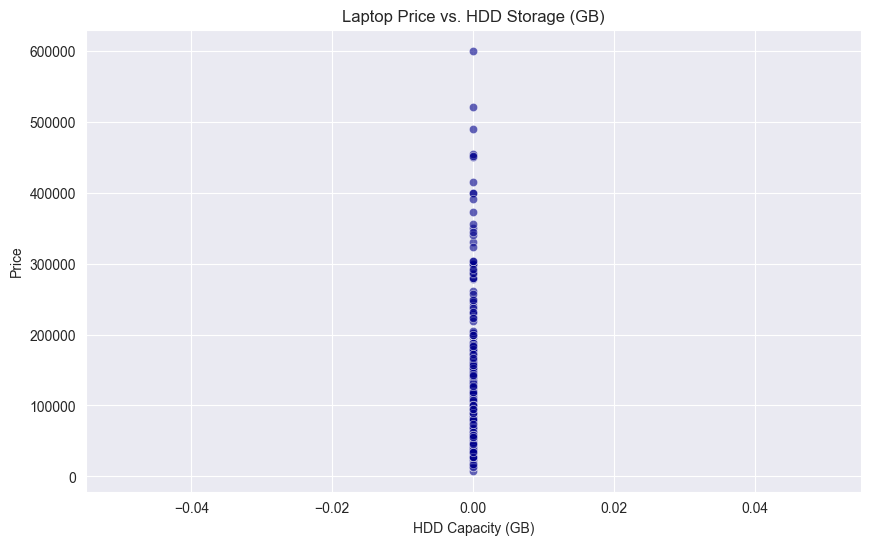

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SSD_Capacity_GB', y='Price', data=laptop_df, alpha=0.6, color='darkgreen')
plt.title('Laptop Price vs. SSD Storage (GB)')
plt.xlabel('SSD Capacity (GB)')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDD_Capacity_GB', y='Price', data=laptop_df, alpha=0.6, color='darkblue')
plt.title('Laptop Price vs. HDD Storage (GB)')
plt.xlabel('HDD Capacity (GB)')
plt.ylabel('Price')
plt.show()

C:\Users\Charan Teja\AppData\Local\Temp\ipykernel_6568\1154514043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gpu_Brand_Category', y='Price', data=laptop_df, palette='deep')


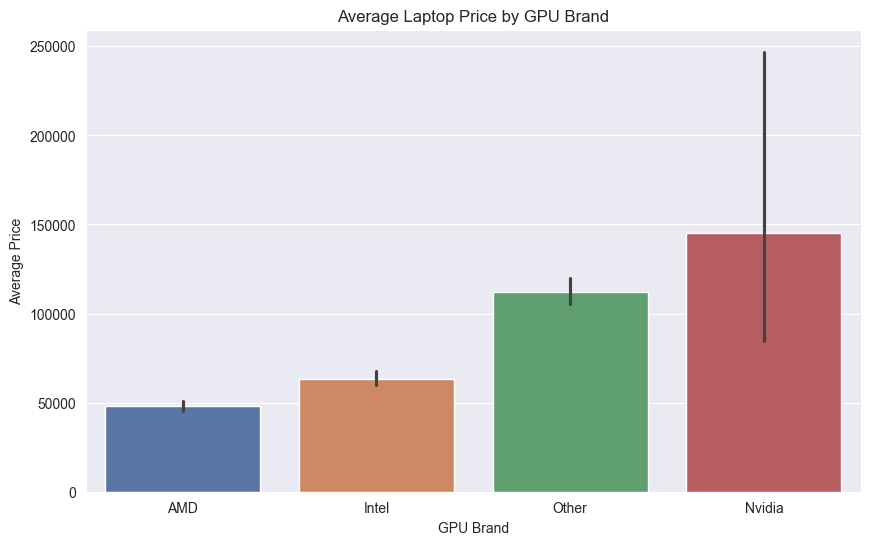

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gpu_Brand_Category', y='Price', data=laptop_df, palette='deep')
plt.title('Average Laptop Price by GPU Brand')
plt.xlabel('GPU Brand')
plt.ylabel('Average Price')
plt.show()

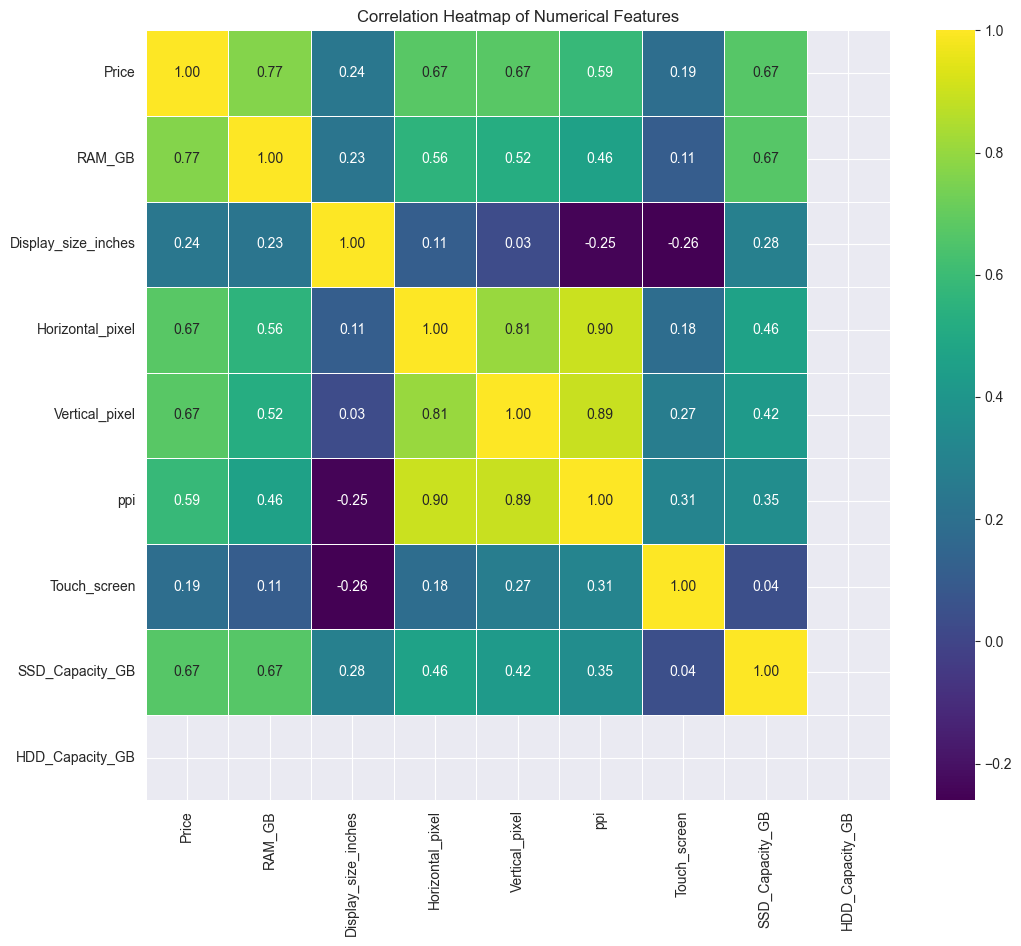

In [53]:
# Calculate how strongly numerical columns are related to each other (correlation)
correlation_matrix = laptop_df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Prepare Data for Machine (Preprocessing)

In [54]:
# 'X' will be all the columns in laptop_df EXCEPT 'Price'
X_features = laptop_df.drop(columns=['Price'])

# 'y' will be just the 'Price' column
# We apply a 'log' (logarithm) transformation to 'Price'
# This helps the model learn better when prices are skewed (like ours)
y_target_log = np.log(laptop_df['Price'])

# Show the first few rows of our features (X) and target (y)
print("\nFirst 2 rows of our Features (X_features):")
X_features.head(2)
print("\nFirst 2 values of our Target (y_target_log - Log Transformed Price):")
y_target_log.head(2)


First 2 rows of our Features (X_features):

First 2 values of our Target (y_target_log - Log Transformed Price):


0    10.827727
1    10.192044
Name: Price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split

# Split X_features and y_target_log into training and testing sets
# 'test_size=0.2' means 20% of the data will be for testing
# 'random_state=7' makes sure the split is always the same if you run the code again
X_train_data, X_test_data, y_train_labels, y_test_labels = train_test_split(
    X_features, y_target_log, test_size=0.2, random_state=7
)

print(f"\nSize of Training Features: {X_train_data.shape[0]} laptops")
print(f"Size of Testing Features: {X_test_data.shape[0]} laptops")


Size of Training Features: 816 laptops
Size of Testing Features: 204 laptops


In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Define which columns are text categories that need converting
categorical_columns_for_encoding = [
    'Brand', 'Cpu_Category', 'Gpu_Brand_Category', 'OS_Category'
]

# Create our transformer: it will apply OneHotEncoder to the text columns
preprocessor_step = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns_for_encoding)
    ],
    remainder='passthrough' # Keep all other (numerical) columns as they are
)

print("\nSetup for converting text categories to numbers is complete.")


Setup for converting text categories to numbers is complete.


# Train the Prediction Brain (Model Training)

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Create our full pipeline:
# Step 1: 'preprocessor_step' (converts text to numbers)
# Step 2: 'RandomForestRegressor' (our prediction model)
prediction_pipeline = Pipeline([
    ('preprocess', preprocessor_step), # First, prepare the data
    ('model', RandomForestRegressor(n_estimators=100, # Build 100 decision trees
                                    random_state=42, # Use this for consistent results
                                    max_depth=10, # Trees won't go too deep
                                    max_features='sqrt' # How many features to consider
                                   ))
])

# Now, let's train our prediction pipeline using the training data
print("\nStarting to train the RandomForestRegressor model...")
prediction_pipeline.fit(X_train_data, y_train_labels)
print("Model training is finished!")


Starting to train the RandomForestRegressor model...
Model training is finished!


# Check the Guesses (Model Evaluation)


Our Model's R2 Score: 0.79
Our Model's Mean Absolute Error (MAE): 15860.23


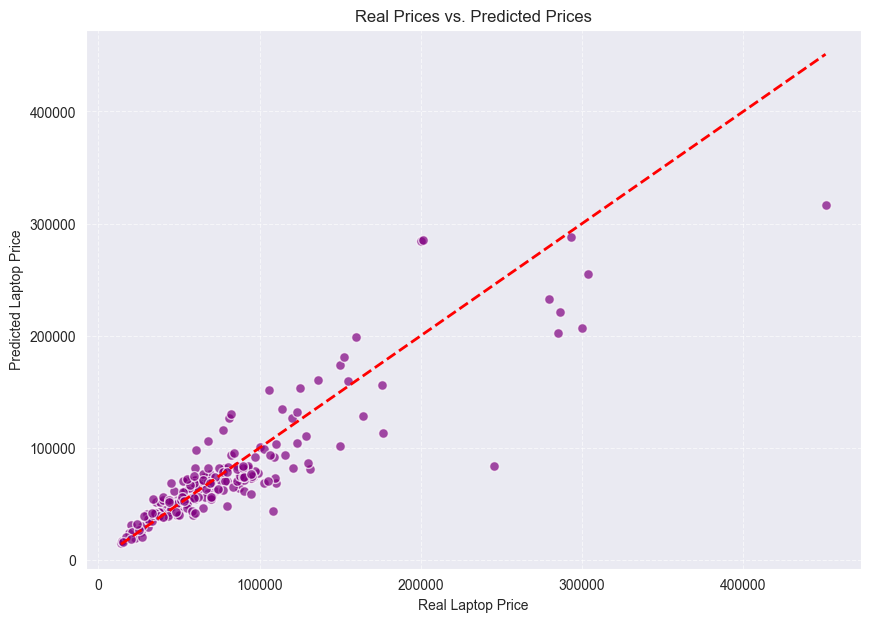

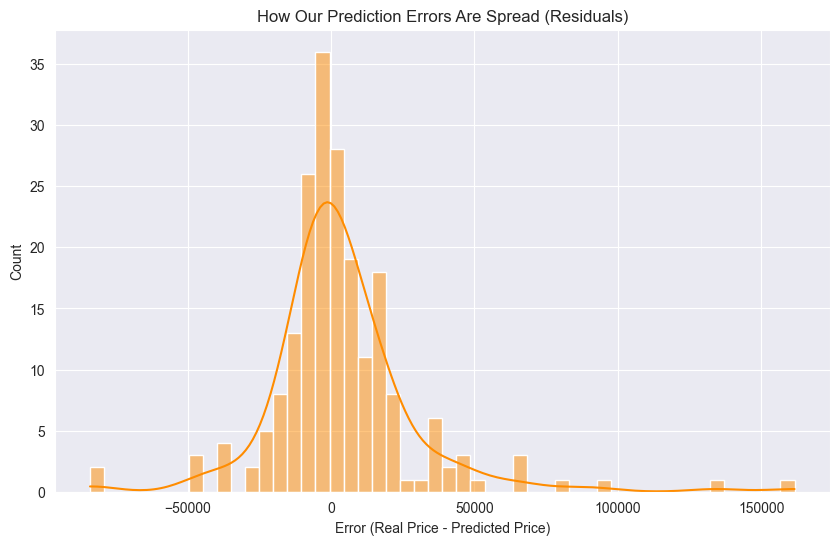

In [58]:
# Make predictions on the test data using our best-tuned model
predicted_log_prices = prediction_pipeline.predict(X_test_data)

# Convert our predictions back to the original price scale
actual_prices_original = np.exp(y_test_labels)
predicted_prices_original = np.exp(predicted_log_prices)

# --- How Good are Our Predictions? ---

# R2 Score: Tells us how well our predictions fit the real data (closer to 1.0 is better).
r2_score_value = r2_score(actual_prices_original, predicted_prices_original)
print(f"\nOur Model's R2 Score: {r2_score_value:.2f}")

# Mean Absolute Error (MAE): Average amount our predictions are off from the actual prices.
mae_value = mean_absolute_error(actual_prices_original, predicted_prices_original)
print(f"Our Model's Mean Absolute Error (MAE): {mae_value:.2f}")

# --- Visualizing Our Model's Guesses ---

# Plot 1: Actual Prices vs. Predicted Prices
plt.figure(figsize=(10, 7))
plt.scatter(actual_prices_original, predicted_prices_original, alpha=0.7, color='purple', edgecolors='w', s=50)
plt.plot([actual_prices_original.min(), actual_prices_original.max()],
         [actual_prices_original.min(), actual_prices_original.max()],
         '--r', linewidth=2) # The perfect prediction line
plt.title('Real Prices vs. Predicted Prices')
plt.xlabel('Real Laptop Price')
plt.ylabel('Predicted Laptop Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 2: Distribution of Prediction Errors (Residuals)
residuals = actual_prices_original - predicted_prices_original
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50, color='darkorange')
plt.title('How Our Prediction Errors Are Spread (Residuals)')
plt.xlabel('Error (Real Price - Predicted Price)')
plt.ylabel('Count')
plt.show()

# Save & Guess More (Model Saving and Prediction)

In [59]:
import pickle

# Save the best trained model
# CHANGE THIS LINE: Use 'prediction_pipeline' instead of 'best_model_tuned'
pickle.dump(prediction_pipeline, open('laptop_price_predictor_final_model.pkl', 'wb'))

# Save a copy of the processed DataFrame (for reference)
# No change needed here
pickle.dump(laptop_df, open('processed_laptop_df_example.pkl', 'wb'))

print("\nModel and processed DataFrame saved!")


Model and processed DataFrame saved!


In [60]:
import pickle
import pandas as pd
import numpy as np

pickle.dump(prediction_pipeline, open('laptop_price_predictor_final_model.pkl', 'wb'))
pickle.dump(laptop_df, open('processed_laptop_df_example.pkl', 'wb'))
print("Model and processed DataFrame saved!")

def predict_new_laptop_price(brand, ram_gb, display_size_inches, horizontal_pixel, vertical_pixel, ppi,
                             touch_screen, cpu_category, ssd_capacity_gb, hdd_capacity_gb,
                             gpu_brand_category, os_category):

    EXPECTED_COLUMNS_FOR_PREDICTION = [
        'Brand', 'RAM_GB', 'Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel',
        'ppi', 'Touch_screen', 'Cpu_Category', 'SSD_Capacity_GB', 'HDD_Capacity_GB',
        'Gpu_Brand_Category', 'OS_Category'
    ]

    new_laptop_data = {
        'Brand': brand,
        'RAM_GB': ram_gb,
        'Display_size_inches': display_size_inches,
        'Horizontal_pixel': horizontal_pixel, # This is now included
        'Vertical_pixel': vertical_pixel,   # This is now included
        'ppi': ppi,
        'Touch_screen': touch_screen,
        'Cpu_Category': cpu_category,
        'SSD_Capacity_GB': ssd_capacity_gb,
        'HDD_Capacity_GB': hdd_capacity_gb,
        'Gpu_Brand_Category': gpu_brand_category,
        'OS_Category': os_category,
    }

    new_laptop_df_input = pd.DataFrame([new_laptop_data], columns=EXPECTED_COLUMNS_FOR_PREDICTION)

    predicted_log_price = prediction_pipeline.predict(new_laptop_df_input)
    final_predicted_price = np.exp(predicted_log_price[0])
    return round(final_predicted_price)

example_price_prediction = predict_new_laptop_price(
    brand='Apple',
    ram_gb=16,
    display_size_inches=13.3,
    horizontal_pixel=2560, # Example value
    vertical_pixel=1600,   # Example value
    ppi=226.98,
    touch_screen=1,
    cpu_category='Apple Silicon',
    ssd_capacity_gb=512,
    hdd_capacity_gb=0,
    gpu_brand_category='Apple',
    os_category='Mac'
)

print(f"\nPredicted price for this example laptop: {example_price_prediction}")

Model and processed DataFrame saved!

Predicted price for this example laptop: 122631
